# Data Retrieval

This may not work on windows so just use the extracted NIPS papers data from the __`nipstxt/`__ folder present in the same directory as this notebook which already has the data pre-downloaded and extracted

In [ ]:
!wget https://cs.nyu.edu/~roweis/data/nips12raw_str602.tgz

--2022-06-07 06:52:51--  https://cs.nyu.edu/~roweis/data/nips12raw_str602.tgz
Resolving cs.nyu.edu (cs.nyu.edu)... 216.165.22.203
Connecting to cs.nyu.edu (cs.nyu.edu)|216.165.22.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12851423 (12M) [application/x-gzip]
Saving to: ‘nips12raw_str602.tgz’

nips12raw_str602.tg 100%[===================>]  12.26M  19.9MB/s    in 0.6s    

2022-06-07 06:52:51 (19.9 MB/s) - ‘nips12raw_str602.tgz’ saved [12851423/12851423]



# Data Extraction

In [ ]:
!tar -xzf nips12raw_str602.tgz

# Load and Pre-process Data

In [ ]:
import os
import numpy as np
import pandas as pd

DATA_PATH = 'nipstxt/'
print(os.listdir(DATA_PATH))

['idx', 'nips06', 'MATLAB_NOTES', 'RAW_DATA_NOTES', 'nips02', 'nips05', 'README_yann', 'nips08', 'nips09', 'orig', 'nips03', 'nips00', 'nips12', 'nips11', 'nips07', 'nips01', 'nips04', 'nips10']


In [ ]:
folders = ["nips{0:02}".format(i) for i in range(0,13)]
# Read all texts into a list.
papers = []
for folder in folders:
    file_names = os.listdir(DATA_PATH + folder)
    for file_name in file_names:
        with open(DATA_PATH + folder + '/' + file_name, encoding='utf-8', errors='ignore', mode='r+') as f:
            data = f.read()
        papers.append(data)
len(papers)

1740

In [ ]:
print(papers[0][:1000])

824 
SYNCHRONIZATION IN NEURAL NETS 
Jacques J. Vidal 
University of California Los Angeles, Los Angeles, Ca. 90024 
John Haggerty' 
ABSTRACT 
The paper presents an artificial neural network concept (the 
Synchronizable Oscillator Networks) where the instants of individual 
firings in the form of point processes constitute the only form of 
information transmitted between joining neurons. This type of 
communication contrasts with that which is assumed in most other 
models which typically are continuous or discrete value-passing 
networks. Limiting the messages received by each processing unit to 
time markers that signal the firing of other units presents significant 
implementation advantages. 
In our model, neurons fire spontaneously and regularly in the 
absence of perturbation. When interaction is present, the scheduled 
firings are advanced or delayed by the firing of neighboring neurons. 
Networks of such neurons become global oscillators which exhibit 
multiple synchronizing a

## Basic Text Preprocessing

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
%%time
import nltk

stop_words = nltk.corpus.stopwords.words('english')
wtk = nltk.tokenize.RegexpTokenizer(r'\w+')
wnl = nltk.stem.wordnet.WordNetLemmatizer()

def normalize_corpus(papers):
    norm_papers = []
    for paper in papers:
        paper = paper.lower()
        paper_tokens = [token.strip() for token in wtk.tokenize(paper)]
        paper_tokens = [wnl.lemmatize(token) for token in paper_tokens if not token.isnumeric()]
        paper_tokens = [token for token in paper_tokens if len(token) > 1]
        paper_tokens = [token for token in paper_tokens if token not in stop_words]
        paper_tokens = list(filter(None, paper_tokens))
        if paper_tokens:
            norm_papers.append(paper_tokens)
            
    return norm_papers
    
norm_papers = normalize_corpus(papers)
print(len(norm_papers))

1740
CPU times: user 38.9 s, sys: 470 ms, total: 39.3 s
Wall time: 44.6 s


In [ ]:
print(norm_papers[0][:50])

['synchronization', 'neural', 'net', 'jacques', 'vidal', 'university', 'california', 'los', 'angeles', 'los', 'angeles', 'ca', 'john', 'haggerty', 'abstract', 'paper', 'present', 'artificial', 'neural', 'network', 'concept', 'synchronizable', 'oscillator', 'network', 'instant', 'individual', 'firing', 'form', 'point', 'process', 'constitute', 'form', 'information', 'transmitted', 'joining', 'neuron', 'type', 'communication', 'contrast', 'assumed', 'model', 'typically', 'continuous', 'discrete', 'value', 'passing', 'network', 'limiting', 'message', 'received']


# Text Representation with Feature Engineering

In [ ]:
import gensim

bigram = gensim.models.Phrases(norm_papers, min_count=20, threshold=20, delimiter=b'_') # higher threshold fewer phrases.
bigram_model = gensim.models.phrases.Phraser(bigram)

print(bigram_model[norm_papers[0]][:50])

['synchronization', 'neural_net', 'jacques', 'vidal', 'university_california', 'los_angeles', 'los_angeles', 'ca', 'john', 'haggerty', 'abstract_paper', 'present', 'artificial_neural', 'network', 'concept', 'synchronizable', 'oscillator', 'network', 'instant', 'individual', 'firing', 'form', 'point', 'process', 'constitute', 'form', 'information', 'transmitted', 'joining', 'neuron', 'type', 'communication', 'contrast', 'assumed', 'model', 'typically', 'continuous', 'discrete', 'value', 'passing', 'network', 'limiting', 'message', 'received', 'processing', 'unit', 'time', 'marker', 'signal', 'firing']


In [ ]:
norm_corpus_bigrams = [bigram_model[doc] for doc in norm_papers]

# Create a dictionary representation of the documents.
dictionary = gensim.corpora.Dictionary(norm_corpus_bigrams)
print('Sample word to number mappings:', list(dictionary.items())[:15])
print('Total Vocabulary Size:', len(dictionary))

Sample word to number mappings: [(0, '6th'), (1, '7g'), (2, 'abrupt'), (3, 'abruptly'), (4, 'absence'), (5, 'abstract_paper'), (6, 'acad_sci'), (7, 'account'), (8, 'accounting'), (9, 'accumulate'), (10, 'accumulating'), (11, 'accumulation'), (12, 'achieved'), (13, 'acknowledge'), (14, 'across')]
Total Vocabulary Size: 78892


In [ ]:
# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.6)
print('Total Vocabulary Size:', len(dictionary))

Total Vocabulary Size: 7756


In [ ]:
# Transforming corpus into bag of words vectors
bow_corpus = [dictionary.doc2bow(text) for text in norm_corpus_bigrams]
print(bow_corpus[1][:50])

[(2, 1), (8, 1), (11, 1), (14, 11), (17, 1), (18, 1), (20, 1), (21, 4), (22, 1), (25, 4), (33, 10), (35, 7), (36, 3), (38, 1), (40, 1), (43, 1), (45, 1), (47, 4), (51, 4), (58, 1), (59, 3), (69, 1), (71, 3), (72, 5), (74, 1), (75, 5), (77, 1), (78, 1), (79, 1), (81, 4), (88, 1), (92, 1), (93, 1), (94, 3), (95, 7), (96, 3), (100, 1), (112, 3), (115, 3), (116, 1), (121, 1), (123, 4), (125, 1), (127, 1), (128, 1), (129, 1), (130, 1), (133, 5), (135, 1), (141, 1)]


In [ ]:
print([(dictionary[idx] , freq) for idx, freq in bow_corpus[1][:50]])

[('acad_sci', 1), ('achieved', 1), ('action', 1), ('activity', 11), ('advanced', 1), ('advantage', 1), ('agreement', 1), ('along', 4), ('american_institute', 1), ('analog', 4), ('artificial_neural', 10), ('associated', 7), ('assumed', 3), ('assumption', 1), ('average', 1), ('becomes', 1), ('behavior', 1), ('binary', 4), ('brain', 4), ('cambridge', 1), ('capable', 3), ('common', 1), ('complexity', 3), ('computing', 5), ('concern', 1), ('condition', 5), ('considerably', 1), ('considered', 1), ('considering', 1), ('constant', 4), ('continuous', 1), ('converge', 1), ('cooperative', 1), ('correspond', 3), ('corresponding', 7), ('corresponds', 3), ('critical', 1), ('derive', 3), ('difference', 3), ('differential', 1), ('discrete', 1), ('distribution', 4), ('dynamic', 1), ('ec', 1), ('effective', 1), ('efficiently', 1), ('either', 1), ('element', 5), ('energy', 1), ('even', 1)]


In [ ]:
print('Total number of papers:', len(bow_corpus))

Total number of papers: 1740


# Topic Models with Latent Dirichlet Allocation (LDA)

In [ ]:
%%time
TOTAL_TOPICS = 22
lda_model = gensim.models.LdaModel(corpus=bow_corpus, id2word=dictionary, chunksize=1740, 
                                   alpha='auto', eta='auto', random_state=42,
                                   iterations=500, num_topics=TOTAL_TOPICS, 
                                   passes=20, eval_every=None)

CPU times: user 3min 49s, sys: 2min 43s, total: 6min 32s
Wall time: 3min 24s


In [ ]:
for topic_id, topic in lda_model.print_topics(num_topics=10, num_words=20):
    print('Topic #'+str(topic_id+1)+':')
    print(topic)
    print()

Topic #6:
0.020*"prediction" + 0.013*"query" + 0.011*"time_series" + 0.008*"cost_function" + 0.007*"training" + 0.006*"local" + 0.005*"curve" + 0.005*"color" + 0.005*"linear" + 0.005*"surface" + 0.004*"predictor" + 0.004*"vector" + 0.004*"optimal" + 0.003*"region" + 0.003*"dynamic" + 0.003*"size" + 0.003*"step" + 0.003*"front" + 0.003*"sample" + 0.003*"et_al"

Topic #8:
0.011*"loss" + 0.008*"neural_net" + 0.006*"state" + 0.006*"vector" + 0.005*"analog" + 0.005*"patient" + 0.005*"neuron" + 0.005*"linear" + 0.005*"computation" + 0.004*"classification" + 0.004*"signal" + 0.004*"threshold" + 0.004*"mlp" + 0.004*"noise" + 0.004*"theorem" + 0.004*"bound" + 0.003*"maass" + 0.003*"arbitrary" + 0.003*"assume" + 0.003*"computational"

Topic #3:
0.034*"unit" + 0.008*"training" + 0.007*"rbf" + 0.006*"pruning" + 0.005*"active" + 0.005*"ob" + 0.005*"vector" + 0.005*"solution" + 0.004*"genetic_algorithm" + 0.004*"search" + 0.004*"attractor" + 0.004*"activation" + 0.004*"region" + 0.004*"population" +

In [ ]:
topics_coherences = lda_model.top_topics(bow_corpus, topn=20)
avg_coherence_score = np.mean([item[1] for item in topics_coherences])
print('Avg. Coherence Score:', avg_coherence_score)

Avg. Coherence Score: -1.189666649298948


In [ ]:
topics_with_wts = [item[0] for item in topics_coherences]
print('LDA Topics with Weights')
print('='*50)
for idx, topic in enumerate(topics_with_wts):
    print('Topic #'+str(idx+1)+':')
    print([(term, round(wt, 3)) for wt, term in topic])
    print()

LDA Topics with Weights
Topic #1:
[('neuron', 0.029), ('cell', 0.011), ('pattern', 0.011), ('synaptic', 0.008), ('activity', 0.008), ('spike', 0.008), ('firing', 0.007), ('layer', 0.005), ('synapsis', 0.005), ('response', 0.005), ('connection', 0.005), ('effect', 0.004), ('threshold', 0.004), ('current', 0.004), ('neural', 0.004), ('simulation', 0.004), ('stimulus', 0.004), ('level', 0.004), ('signal', 0.003), ('mechanism', 0.003)]

Topic #2:
[('cell', 0.03), ('neuron', 0.013), ('response', 0.013), ('stimulus', 0.01), ('cortical', 0.009), ('visual', 0.008), ('activity', 0.007), ('orientation', 0.007), ('receptive_field', 0.007), ('cortex', 0.006), ('spatial', 0.006), ('unit', 0.005), ('map', 0.005), ('correlation', 0.005), ('eye', 0.005), ('contrast', 0.004), ('et_al', 0.004), ('center', 0.004), ('direction', 0.004), ('connection', 0.004)]

Topic #3:
[('distribution', 0.01), ('estimate', 0.009), ('prior', 0.009), ('noise', 0.008), ('sample', 0.007), ('training', 0.007), ('approximation

In [ ]:
print('LDA Topics without Weights')
print('='*50)
for idx, topic in enumerate(topics_with_wts):
    print('Topic #'+str(idx+1)+':')
    print([term for wt, term in topic])
    print()

LDA Topics without Weights
Topic #1:
['theorem', 'let', 'bound', 'class', 'probability', 'threshold', 'approximation', 'size', 'complexity', 'polynomial', 'linear', 'proof', 'vector', 'consider', 'sequence', 'theory', 'unit', 'defined', 'constant', 'distribution']

Topic #2:
['neuron', 'cell', 'firing', 'response', 'spike', 'synaptic', 'activity', 'current', 'effect', 'pattern', 'synapsis', 'et_al', 'simulation', 'threshold', 'neural', 'stimulus', 'mechanism', 'change', 'membrane', 'unit']

Topic #3:
['unit', 'control', 'memory', 'architecture', 'training', 'layer', 'controller', 'vector', 'activation', 'processor', 'structure', 'application', 'local', 'neural', 'adaptive', 'pattern', 'connection', 'bit', 'parallel', 'simulation']

Topic #4:
['cell', 'unit', 'visual', 'map', 'motion', 'layer', 'receptive_field', 'response', 'pattern', 'orientation', 'activity', 'direction', 'spatial', 'stimulus', 'cortical', 'neuron', 'eye', 'center', 'field', 'local']

Topic #5:
['distribution', 'vari

In [ ]:
cv_coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, corpus=bow_corpus, 
                                                      texts=norm_corpus_bigrams,
                                                      dictionary=dictionary, 
                                                      coherence='c_v')
avg_coherence_cv = cv_coherence_model_lda.get_coherence()

umass_coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, corpus=bow_corpus, 
                                                         texts=norm_corpus_bigrams,
                                                         dictionary=dictionary, 
                                                         coherence='u_mass')
avg_coherence_umass = umass_coherence_model_lda.get_coherence()

perplexity = lda_model.log_perplexity(bow_corpus)

print('Avg. Coherence Score (Cv):', avg_coherence_cv)
print('Avg. Coherence Score (UMass):', avg_coherence_umass)
print('Model Perplexity:', perplexity)

Avg. Coherence Score (Cv): 0.4735019799055251
Avg. Coherence Score (UMass): -1.2294796053025587
Model Perplexity: -7.723011983951379


# LDA Models with MALLET

In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

--2022-05-31 02:37:21--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip [following]
--2022-05-31 02:37:21--  https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  61.2MB/s    in 0.3s    

2022-05-31 02:37:22 (61.2 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]



In [ ]:
!unzip -q mallet-2.0.8.zip

In [ ]:
MALLET_PATH = 'mallet-2.0.8/bin/mallet'
TOTAL_TOPICS = 10
lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path=MALLET_PATH, corpus=bow_corpus, 
                                              num_topics=TOTAL_TOPICS, id2word=dictionary,
                                              iterations=500, workers=16)

In [ ]:
topics = [[(term, round(wt, 3)) 
               for term, wt in lda_mallet.show_topic(n, topn=20)] 
                   for n in range(0, TOTAL_TOPICS)]

for idx, topic in enumerate(topics):
    print('Topic #'+str(idx+1)+':')
    print([term for term, wt in topic])
    print()

Topic #1:
['distribution', 'probability', 'gaussian', 'variable', 'prior', 'density', 'estimate', 'mixture', 'component', 'estimation', 'bayesian', 'matrix', 'variance', 'approximation', 'noise', 'sample', 'vector', 'likelihood', 'log', 'structure']

Topic #2:
['circuit', 'chip', 'current', 'bit', 'signal', 'analog', 'voltage', 'code', 'implementation', 'design', 'threshold', 'neuron', 'noise', 'element', 'operation', 'computation', 'neural', 'parallel', 'processor', 'node']

Topic #3:
['rule', 'representation', 'task', 'structure', 'target', 'human', 'feature', 'level', 'subject', 'search', 'domain', 'experiment', 'instance', 'similarity', 'learned', 'table', 'type', 'measure', 'knowledge', 'user']

Topic #4:
['state', 'control', 'action', 'step', 'trajectory', 'policy', 'dynamic', 'task', 'environment', 'controller', 'optimal', 'reinforcement_learning', 'goal', 'change', 'robot', 'path', 'current', 'adaptive', 'move', 'position']

Topic #5:
['training', 'class', 'classifier', 'classi

In [ ]:
cv_coherence_model_lda_mallet = gensim.models.CoherenceModel(model=lda_mallet, corpus=bow_corpus, 
                                                             texts=norm_corpus_bigrams,
                                                             dictionary=dictionary, 
                                                             coherence='c_v')
avg_coherence_cv = cv_coherence_model_lda_mallet.get_coherence()

umass_coherence_model_lda_mallet = gensim.models.CoherenceModel(model=lda_mallet, corpus=bow_corpus, 
                                                                texts=norm_corpus_bigrams,
                                                                dictionary=dictionary,  
                                                                coherence='u_mass')
avg_coherence_umass = umass_coherence_model_lda_mallet.get_coherence()

perplexity = lda_model.log_perplexity(bow_corpus)

print('Avg. Coherence Score (Cv):', avg_coherence_cv)
print('Avg. Coherence Score (UMass):', avg_coherence_umass)
print('Model Perplexity:', perplexity)

Avg. Coherence Score (Cv): 0.503794069865159
Avg. Coherence Score (UMass): -1.003931822245573
Model Perplexity: -7.7230127227340555


# LDA Tuning - Finding Optimal Number of Topics

In [ ]:
from tqdm import tqdm

def topic_model_coherence_generator(corpus, texts, dictionary, 
                                    start_topic_count=2, end_topic_count=30, step=1,
                                    cpus=1):
    
    models = []
    coherence_scores = []
    for topic_nums in tqdm(range(start_topic_count, end_topic_count+1, step)):
        mallet_lda_model = gensim.models.wrappers.LdaMallet(mallet_path=MALLET_PATH, corpus=corpus,
                                                            num_topics=topic_nums, id2word=dictionary,
                                                            iterations=500, workers=cpus)
        cv_coherence_model_mallet_lda = gensim.models.CoherenceModel(model=mallet_lda_model, corpus=corpus, 
                                                                     texts=texts, dictionary=dictionary, 
                                                                     coherence='c_v')
        coherence_score = cv_coherence_model_mallet_lda.get_coherence()
        coherence_scores.append(coherence_score)
        models.append(mallet_lda_model)
    
    return models, coherence_scores

In [ ]:
lda_models, coherence_scores = topic_model_coherence_generator(corpus=bow_corpus, texts=norm_corpus_bigrams,
                                                               dictionary=dictionary, start_topic_count=2,
                                                               end_topic_count=30, step=1, cpus=16)

100%|██████████| 29/29 [1:40:33<00:00, 208.06s/it]


In [ ]:
coherence_df = pd.DataFrame({'Number of Topics': range(2, 31, 1),
                             'Coherence Score': np.round(coherence_scores, 4)})
coherence_df.sort_values(by=['Coherence Score'], ascending=False).head(10)

,Number of Topics,Coherence Score
20,22,0.5502
18,20,0.5488
21,23,0.5398
27,29,0.5378
23,25,0.5364
22,24,0.5357
28,30,0.5357
12,14,0.5354
15,17,0.5353
16,18,0.5337


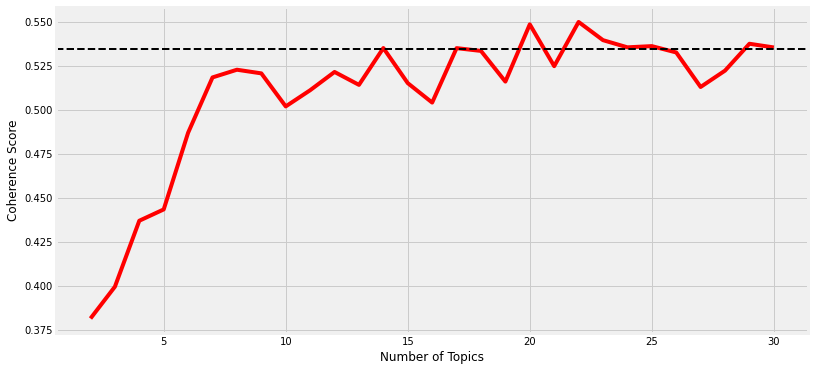

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

x_ax = range(2, 31, 1)
y_ax = coherence_scores
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_ax, c='r')
plt.axhline(y=0.535, c='k', linestyle='--', linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'
xl = plt.xlabel('Number of Topics')
yl = plt.ylabel('Coherence Score')

In [ ]:
2 - 0.380
3 - 0.397
4 - 0.437
5 - 0.445
6 - 0.487
7 - 0.519
8 - 0.524
9 - 0.520
10 - 0.505
11 - 0.513
12 - 0.523
13 - 0.515
14 - 0.535
15 - 0.515
16 - 0.505
17  - 0.535
18 - 0.533
19 - 0.517
20 - 0.548
21 - 0.525
22 - 0.550
23 - 0.539
24 - 0.535
25 - 0.536
26 - 0.534
27 - 0.513
28 - 0.523
29 - 0.537
30 - 0.535

In [ ]:
best_model_idx = coherence_df[coherence_df['Number of Topics'] == 22].index[0]
best_lda_model = lda_models[best_model_idx]
best_lda_model.num_topics

22

In [ ]:
topics = [[(term, round(wt, 3)) 
               for term, wt in best_lda_model.show_topic(n, topn=20)] 
                   for n in range(0, best_lda_model.num_topics)]

for idx, topic in enumerate(topics):
    print('Topic #'+str(idx+1)+':')
    print([term for term, wt in topic])
    print()

Topic #1:
['equation', 'dynamic', 'solution', 'matrix', 'neuron', 'state', 'energy', 'attractor', 'constraint', 'eq', 'fixed_point', 'phase', 'stable', 'hopfield', 'rule', 'stability', 'equilibrium', 'nonlinear', 'eigenvalue', 'defined']

Topic #2:
['unit', 'layer', 'pattern', 'activation', 'representation', 'connection', 'module', 'structure', 'architecture', 'activity', 'connectionist', 'represent', 'level', 'type', 'role', 'processing', 'local', 'represented', 'part', 'representing']

Topic #3:
['rate', 'gradient', 'convergence', 'step', 'iteration', 'update', 'gradient_descent', 'adaptive', 'optimization', 'vector', 'minimum', 'change', 'derivative', 'constant', 'cost_function', 'optimal', 'line', 'initial', 'local_minimum', 'technique']

Topic #4:
['signal', 'frequency', 'channel', 'filter', 'spike', 'rate', 'temporal', 'response', 'noise', 'event', 'auditory', 'sound', 'delay', 'amplitude', 'detection', 'source', 'stimulus', 'phase', 'component', 'spike_train']

Topic #5:
['noise

In [ ]:
topics_df = pd.DataFrame([[term for term, wt in topic] 
                              for topic in topics], 
                         columns = ['Term'+str(i) for i in range(1, 21)],
                         index=['Topic '+str(t) for t in range(1, best_lda_model.num_topics+1)]).T
topics_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,...,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22
Term1,equation,unit,rate,signal,noise,bound,map,visual,training,state,...,classification,memory,state,image,node,control,neuron,vector,probability,linear
Term2,dynamic,layer,gradient,frequency,distribution,class,subject,motion,hidden_unit,action,...,class,bit,sequence,feature,tree,position,cell,matrix,distribution,estimate
Term3,solution,pattern,convergence,channel,average,theorem,effect,response,task,policy,...,training,code,recurrent,object,graph,trajectory,activity,cluster,prior,kernel
Term4,matrix,activation,step,filter,curve,probability,stimulus,direction,rule,step,...,classifier,vector,prediction,pixel,variable,movement,synaptic,distance,gaussian,nonlinear
Term5,neuron,representation,iteration,spike,theory,proof,study,receptive_field,net,reinforcement_learning,...,test,capacity,transition,face,structure,motor,response,clustering,mixture,regression
Term6,state,connection,update,rate,equation,loss,change,region,trained,control,...,feature,parallel,symbol,view,element,controller,firing,component,variable,estimation
Term7,energy,module,gradient_descent,temporal,optimal,hypothesis,development,orientation,architecture,optimal,...,pattern,processor,step,representation,size,target,cortical,linear,density,approximation
Term8,attractor,structure,adaptive,response,variance,complexity,correlation,spatial,generalization,environment,...,training_set,pattern,dynamic,recognition,computation,hand,connection,transformation,bayesian,local
Term9,constraint,architecture,optimization,noise,correlation,theory,activity,location,back_propagation,task,...,sample,size,context,part,threshold,feedback,synapsis,source,likelihood,training
Term10,eq,activity,vector,event,generalization_error,defined,brain,center,hidden_layer,goal,...,experiment,block,language,scale,level,dynamic,pattern,structure,sample,rbf


In [ ]:
pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic])  
                              for topic in topics],
                         columns = ['Terms per Topic'],
                         index=['Topic'+str(t) for t in range(1, best_lda_model.num_topics+1)]
                         )
topics_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,Terms per Topic
Topic1,"equation, dynamic, solution, matrix, neuron, state, energy, attractor, constraint, eq, fixed_point, phase, stable, hopfield, rule, stability, equilibrium, nonlinear, eigenvalue, defined"
Topic2,"unit, layer, pattern, activation, representation, connection, module, structure, architecture, activity, connectionist, represent, level, type, role, processing, local, represented, part, representing"
Topic3,"rate, gradient, convergence, step, iteration, update, gradient_descent, adaptive, optimization, vector, minimum, change, derivative, constant, cost_function, optimal, line, initial, local_minimum, technique"
Topic4,"signal, frequency, channel, filter, spike, rate, temporal, response, noise, event, auditory, sound, delay, amplitude, detection, source, stimulus, phase, component, spike_train"
Topic5,"noise, distribution, average, curve, theory, equation, optimal, variance, correlation, generalization_error, limit, ensemble, size, eq, entropy, teacher, linear, student, effect, stochastic"
Topic6,"bound, class, theorem, probability, proof, loss, hypothesis, complexity, theory, defined, assume, distribution, concept, property, bounded, linear, define, xi, sample, definition"
Topic7,"map, subject, effect, stimulus, study, change, development, correlation, activity, brain, pattern, similarity, experiment, human, trial, cue, theory, eye, rule, response"
Topic8,"visual, motion, response, direction, receptive_field, region, orientation, spatial, location, center, cell, field, stimulus, contrast, local, velocity, map, edge, contour, stage"
Topic9,"training, hidden_unit, task, rule, net, trained, architecture, generalization, back_propagation, hidden_layer, learn, target, hidden, training_set, table, learned, knowledge, backpropagation, epoch, domain"
Topic10,"state, action, policy, step, reinforcement_learning, control, optimal, environment, task, goal, reward, td, agent, rl, reinforcement, cost, trial, current, call, exploration"


# Interpreting Topic Model Results

In [ ]:
tm_results = best_lda_model[bow_corpus]

In [ ]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] 
                     for topics in tm_results]
corpus_topics[:5]

[(0, 0.5091877180484774),
 (18, 0.290691492649877),
 (16, 0.28298884801774965),
 (0, 0.3514895793376806),
 (18, 0.4824901618150563)]

In [ ]:
corpus_topic_df = pd.DataFrame()
corpus_topic_df['Document'] = range(0, len(papers))
corpus_topic_df['Dominant Topic'] = [item[0]+1 for item in corpus_topics]
corpus_topic_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]
corpus_topic_df['Topic Desc'] = [topics_df.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]
corpus_topic_df['Paper'] = papers
corpus_topic_df.head()

,Document,Dominant Topic,Contribution %,Topic Desc,Paper
0,0,1,50.92,"equation, dynamic, solution, matrix, neuron, state, energy, attractor, constraint, eq, fixed_point, phase, stable, hopfield, rule, stability, equilibrium, nonlinear, eigenvalue, defined","554 \nSTABILITY RESULTS FOR NEURAL NETWORKS \nA. N. Michel  , J. A. Farrell  , and W. Porod 2 \nDepartment of Electrical and Computer Engineering \nUniversity of Notre Dame \nNotre Dame, IN 4655..."
1,1,19,29.07,"neuron, cell, activity, synaptic, response, firing, cortical, connection, synapsis, pattern, stimulus, neural, et_al, cortex, neuronal, simulation, inhibitory, mechanism, oscillator, excitatory","709 \nTIME-SEQUENTIAL SELF-ORGANIZATION OF HIERARCHICAL \nNEURAL NETWORKS \nRonald H. Silverman \nCornell University Medical College, New York, NY 10021 \nAndrew S. Noetzel \nPolytechnic Universit..."
2,2,17,28.30,"node, tree, graph, variable, structure, element, size, computation, threshold, level, depth, edge, binary, partition, gate, polynomial, neural_net, leaf, computed, arbitrary",137 \nOn the \nPower of Neural Networks for \nSolving Hard Problems \nJehoshua Bruck \nJoseph W. Goodman \nInformation Systems Laboratory \nDepartment of Electrical Engineering \nStanford Universi...
3,3,1,35.15,"equation, dynamic, solution, matrix, neuron, state, energy, attractor, constraint, eq, fixed_point, phase, stable, hopfield, rule, stability, equilibrium, nonlinear, eigenvalue, defined","432 \nPerformance Measures for Associative Memories \nthat Learn and Forget \nAnthony Kuh \nDepartment of Electrical Engineering \nUniversity of Hawaii at Manoa \nHonolulu HI, 96822 \nABSTRACT \nR..."
4,4,19,48.25,"neuron, cell, activity, synaptic, response, firing, cortical, connection, synapsis, pattern, stimulus, neural, et_al, cortex, neuronal, simulation, inhibitory, mechanism, oscillator, excitatory","457 \nDISTRIBUTED NEURAL INFORMATION PROCESSING \nIN THE VESTIBULO-OCULAR SYSTEM \nClifford Lau \nOffice of Naval Research Detachment \nPasadena, CA 91106 \nVicente Honrubia* \nUCLA Division of He..."


## Dominant Topics in Specific Research Papers

In [ ]:
pd.set_option('display.max_colwidth', 200)
(corpus_topic_df[corpus_topic_df['Dominant Topic']
                 .isin([20,1])])

,Document,Dominant Topic,Contribution %,Topic Desc,Paper
0,0,1,50.92,"equation, dynamic, solution, matrix, neuron, state, energy, attractor, constraint, eq, fixed_point, phase, stable, hopfield, rule, stability, equilibrium, nonlinear, eigenvalue, defined","554 \nSTABILITY RESULTS FOR NEURAL NETWORKS \nA. N. Michel  , J. A. Farrell  , and W. Porod 2 \nDepartment of Electrical and Computer Engineering \nUniversity of Notre Dame \nNotre Dame, IN 4655..."
3,3,1,35.15,"equation, dynamic, solution, matrix, neuron, state, energy, attractor, constraint, eq, fixed_point, phase, stable, hopfield, rule, stability, equilibrium, nonlinear, eigenvalue, defined","432 \nPerformance Measures for Associative Memories \nthat Learn and Forget \nAnthony Kuh \nDepartment of Electrical Engineering \nUniversity of Hawaii at Manoa \nHonolulu HI, 96822 \nABSTRACT \nR..."
7,7,20,19.38,"vector, matrix, cluster, distance, clustering, component, linear, transformation, source, structure, dimensional, map, dimension, mapping, representation, basis, pca, ica, feature, projection","485 \nTOWARDS AN ORGANIZING PRINCIPLE FOR \nA LAYERED PERCEPTUAL NETWORK \nRalph Linsker \nIBM Thomas J. Watson Research Center, Yorktown Heights, NY 10598 \nAbstract \nAn information-theoretic op..."
14,14,1,45.73,"equation, dynamic, solution, matrix, neuron, state, energy, attractor, constraint, eq, fixed_point, phase, stable, hopfield, rule, stability, equilibrium, nonlinear, eigenvalue, defined","397 \nAN OPTIMIZATION NETWORK FOR MATRIX INVERSION \nJu-Seog Jang, Soo-Young Lee, and Sang-Yung Shin \nKorea Advanced Institute of Science and Technology, \nP.O. Box 150, Cheongryang, Seoul, Korea..."
21,21,1,17.90,"equation, dynamic, solution, matrix, neuron, state, energy, attractor, constraint, eq, fixed_point, phase, stable, hopfield, rule, stability, equilibrium, nonlinear, eigenvalue, defined",31 \nAN ARTIFICIAL NEURAL NETWORK FOR SPATIO- \nTEMPORAL BIPOLAR PATTERNS: APPLICATION TO \nPHONEME CLASSIFICATION \nToshiteru Homma \nLes E. Atlas \nRobert J. Marks H \nInteractive Systems Design...
...,...,...,...,...,...
1685,1685,20,33.51,"vector, matrix, cluster, distance, clustering, component, linear, transformation, source, structure, dimensional, map, dimension, mapping, representation, basis, pca, ica, feature, projection",Image representations for facial expression \ncoding \nMarian Stewart Bartlett* \nU.C. San Diego \nmarnisalk. edu \nJavier R. Movellan \nU.C. San Diego \nmovellancogsc. ucsd. edu \nPaul Ekman \n...
1714,1714,20,29.32,"vector, matrix, cluster, distance, clustering, component, linear, transformation, source, structure, dimensional, map, dimension, mapping, representation, basis, pca, ica, feature, projection","Learning the Similarity of Documents: \nAn Information-Geometric Approach to \nDocument Retrieval and Categorization \nThomas Hofmann \nDepartment of Computer Science \nBrown University, Providenc..."
1717,1717,20,53.15,"vector, matrix, cluster, distance, clustering, component, linear, transformation, source, structure, dimensional, map, dimension, mapping, representation, basis, pca, ica, feature, projection",Emergence of Topography and Complex \nCell Properties from Natural Images \nusing Extensions of ICA \nAapo HyvSrinen and Patrik Hoyer \nNeural Networks Research Center \nHelsinki University of Tec...
1723,1723,20,19.76,"vector, matrix, cluster, distance, clustering, component, linear, transformation, source, structure, dimensional, map, dimension, mapping, representation, basis, pca, ica, feature, projection","Agglomerative Information Bottleneck \nNoam $1onim Naftali Tishby* \nInstitute of Computer Science and \nCenter for Neural Computation \nThe Hebrew University \nJerusalem, 91904 Israel \nemaih {no..."


In [ ]:
pd.set_option('display.max_colwidth', 200)
(corpus_topic_df[corpus_topic_df['Document']
                 .isin([681, 9, 392, 1622, 17, 
                        906, 996, 503, 13, 733])])


,Document,Dominant Topic,Contribution %,Topic Desc,Paper
9,9,14,54.43,"memory, bit, code, vector, capacity, parallel, processor, pattern, size, block, connection, user, stored, operation, computer, machine, address, application, search, program",804 \nINTRODUCTION TO A SYSTEM FOR IMPLEMENTING NEURAL NET \nCONNECTIONS ON SIMD ARCHITECTURES \nSherryl Tomboulian \nInstitute for Computer Applications in Science and Engineering \nNASA Langley ...
13,13,3,29.01,"rate, gradient, convergence, step, iteration, update, gradient_descent, adaptive, optimization, vector, minimum, change, derivative, constant, cost_function, optimal, line, initial, local_minimum,...",164 \nMATHEMATICAL ANALYSIS OF LEARNING BEHAVIOR \nOF NEURONAL MODELS \nBY \n.JOHN Y. CHEUNG \nMASSOUD OMIDVAR \nSCHOOL OF ELECTRICAL ENGINEERING AND COMPUTER SCIENCE \nUNIVERSITY OF OKLAHOMA \nNO...
17,17,16,30.28,"image, feature, object, pixel, face, view, representation, recognition, part, scale, shape, scene, matching, position, human, frame, texture, vision, rotation, location","83O \nInvariant Object Recognition Using a Distributed Associative Memory \nHarry Wechsler and George Lee Zimmerman \nDepartment of Electrical Engineering \nUniversity of Minnesota \nMinneapolis, ..."
392,392,11,36.71,"word, recognition, speech, training, character, hmm, letter, context, speaker, frame, feature, digit, trained, speech_recognition, phoneme, vowel, segmentation, mlp, hybrid, experiment","From Speech Recognition to Spoken Language \nUnderstanding: The Development of the MIT \nSUMMIT and VOYAGER Systems \nVictor Zue, James Glass, David Goodine, Lynette Hirschman, \nHong Leung, Micha..."
503,503,18,56.35,"control, position, trajectory, movement, motor, controller, target, hand, feedback, dynamic, robot, forward, change, arm, field, behavior, head, sensory, sensor, move","A Neural Net Model for Adaptive Control of \nSaccadic Accuracy by Primate Cerebellum and \nBrainstem \nPaul Dean a, John E. W. Mayhew and Pat Langdon \nDepartment of Psychology a and Artificial In..."
681,681,7,19.70,"map, subject, effect, stimulus, study, change, development, correlation, activity, brain, pattern, similarity, experiment, human, trial, cue, theory, eye, rule, response","A Neural Network that Learns to Interpret \nMyocardial Planar Thallium Scintigrams \nCharles Rosenberg, Ph.D.* \nDepartment of Computer Science \nHebrew University \nJerusalem, Israel \nJacob Erei..."
733,733,8,20.04,"visual, motion, response, direction, receptive_field, region, orientation, spatial, location, center, cell, field, stimulus, contrast, local, velocity, map, edge, contour, stage","Statistics of Natural Images: \nScaling in the Woods \nDaniel L. Ruderman* and William Bialek \nNEC Research Institute \n4 Independence Way \nPrinceton, N.J. 08540 \nAbstract \nIn order to best un..."
906,906,21,24.83,"probability, distribution, prior, gaussian, mixture, variable, density, bayesian, likelihood, sample, estimate, log, approximation, component, em, posterior, step, probabilistic, evidence, procedure",Classifying with Gaussian Mixtures and \nClusters \nNanda Kambhatla and Todd K. Leen \nDepartment of Computer Science and Engineering \nOregon Graduate Institute of Science & Technology \nP.O. Box...
996,996,3,25.79,"rate, gradient, convergence, step, iteration, update, gradient_descent, adaptive, optimization, vector, minimum, change, derivative, constant, cost_function, optimal, line, initial, local_minimum,...","A Multiscale Attentional Framework for \nRelaxation Neural Networks \nDimitris I. Tsioutsias \nDept. of Electrical Engineering \nYale University \nNew Haven, CT 06520-8285 \nt sioutsiascs. yale. ..."
1622,1622,17,41.07,"node, tree, graph, variable, structure, element, size, computation, threshold, level, depth, edge, binary, partition, gate, polynomial, neural_net, leaf, computed, arbitrary","Boosting with Multi-Way Branching in \nDecision Trees \nYishay Mansour \nDavid McAllester \nAT&T Labs-Research \n180 Park Ave \nFlorha

## Relevant Research Papers per Topic based on Dominance

In [ ]:
corpus_topic_df.groupby('Dominant Topic').apply(lambda topic_set: (topic_set.sort_values(by=['Contribution %'], 
                                                                                         ascending=False)
                                                                             .iloc[0]))

,Document,Dominant Topic,Contribution %,Topic Desc,Paper
Dominant Topic,,,,,
1,145,1,65.11,"equation, dynamic, solution, matrix, neuron, state, energy, attractor, constraint, eq, fixed_point, phase, stable, hopfield, rule, stability, equilibrium, nonlinear, eigenvalue, defined","568 \nDYNAMICS OF ANALOG NEURAL \nNETWORKS WITH TIME DELAY \nC.M. Marcus and R.M. Westervelt \nDivision of Applied Sciences and Department of Physics \nHarvard University, Cambridge Massachusetts ..."
2,57,2,60.21,"unit, layer, pattern, activation, representation, connection, module, structure, architecture, activity, connectionist, represent, level, type, role, processing, local, represented, part, represen...","73O \nAnalysis of distributed representation of \nconstituent structure in connectionist systems \nPaul Smolensky \nDepartment of Computer Science, University of Colorado, Boulder, CO 80309-0430 \..."
3,337,3,56.57,"rate, gradient, convergence, step, iteration, update, gradient_descent, adaptive, optimization, vector, minimum, change, derivative, constant, cost_function, optimal, line, initial, local_minimum,...","Note on Learning Rate Schedules for Stochastic \nOptimization \nChristian Darken and John Moody \nYale University \nP.O. Box 2158 Yale Station \nNew Haven, CT 06520 \nEmail: moody@cs.yale.edu \nAb..."
4,1693,4,65.82,"signal, frequency, channel, filter, spike, rate, temporal, response, noise, event, auditory, sound, delay, amplitude, detection, source, stimulus, phase, component, spike_train","An Analog VLSI Model of \nPeriodicity Extraction \nAndr6 van Schaik \nComputer Engineering Laboratory \nJ03, University of Sydney, NSW 2006 \nSydney, Australia \nandrenee. usyd. edu.au \nAbstract ..."
5,1536,5,70.11,"noise, distribution, average, curve, theory, equation, optimal, variance, correlation, generalization_error, limit, ensemble, size, eq, entropy, teacher, linear, student, effect, stochastic","Dynamics of Supervised Learning with \nRestricted Training Sets \nA.C.C. Coolen \nDept of Mathematics \nKing's College London \nStrand, London WC2R 2LS, UK \ntcoolen @mth.kcl.ac.uk \nD. Saad \nNeu..."
6,532,6,84.17,"bound, class, theorem, probability, proof, loss, hypothesis, complexity, theory, defined, assume, distribution, concept, property, bounded, linear, define, xi, sample, definition","Polynomial Uniform Convergence of \nRelative Frequencies to Probabilities \nAlberto Bertoni, Paola Campadelll;' Anna Morpurgo, Sandra Panlzza \nDipartimento di Scienze dell'Informazione \nUniversi..."
7,351,7,63.63,"map, subject, effect, stimulus, study, change, development, correlation, activity, brain, pattern, similarity, experiment, human, trial, cue, theory, eye, rule, response","Further Studies of a Model for the \nDevelopment and Regeneration \nof Eye-Brain Maps \nJ.D. Cowan & A.E. Friedman \nDepartment of Mathematics, Committee on \nNeurobiology, and Brain Research Inst..."
8,1031,8,60.34,"visual, motion, response, direction, receptive_field, region, orientation, spatial, location, center, cell, field, stimulus, contrast, local, velocity, map, edge, contour, stage","A \nNeural Network Model of 3-D \nLightness Perception \nLuiz Pessoa \nFederal Univ. of Rio de Janeiro \nRio de Janeiro, RJ, Brazil \npessoa@cos.ufrj.br \nWilliam D. Ross \nBoston University \nBos..."
9,1688,9,54.02,"training, hidden_unit, task, rule, net, trained, architecture, generalization, back_propagation, hidden_layer, learn, target, hidden, training_set, table, learned, knowledge, backpropagation, epoc...","Learning Statistically Neutral Tasks \nwithout Expert Guidance \nTon Weijters \nInformation Technology, \nEindhoven University, \nThe Netherlands \nAntal van den Bosch \nILK, \nTilburg University,..."


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS
def word_cloud(topic, model):
    plt.figure(figsize = (8,6))
    topic_words = [model.print_topic(topic, 75)]
    cloud = WordCloud(stopwords = STOPWORDS, background_color = 'white',
                      width=2500, height=1800).generate(" ".join(topic_words))

    print('\nWordcloud for topic:', topic, '\n')
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()

In [ ]:
for topic in range(20): 
    #plt.figure(figsize=(10,15)) 
    word_cloud(topic, best_lda_model)

In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
4      0.015475  0.077787       1        1  9.724740
20     0.098416 -0.038245       2        1  6.818970
11    -0.137853  0.022318       3        1  6.577766
13     0.075448 -0.039568       4        1  6.150658
9      0.051523 -0.020809       5        1  6.022710
7      0.101953 -0.088181       6        1  5.522355
19    -0.177739 -0.054361       7        1  5.231841
3     -0.041738  0.140802       8        1  5.087388
16    -0.015890  0.018976       9        1  4.978903
1      0.051782 -0.044941      10        1  4.727085
5      0.047236  0.043774      11        1  4.396857
21     0.100191  0.062399      12        1  4.343823
17    -0.115644  0.028472      13        1  4.075037
18    -0.113397 -0.017810      14        1  4.012504
12     0.084205  0.086568      15        1  3.810696
0     -0.013961 -0.104509      16        1  3.707818
6     -0.135950  0.038314      17        1  3.556135
8     -0.067820 -0.134448      18        1  2.950395
2      0.016133  0.053749      19        1  2.574343
14     0.064346 -0.020052      20        1  2.034311
15     0.038453  0.027151      21        1  2.028168
10     0.074830 -0.037386      22        1  1.667496, topic_info=           Term         Freq        Total Category  logprob  loglift
1152      image  6519.000000  6519.000000  Default  30.0000  30.0000
297      neuron  8030.000000  8030.000000  Default  29.0000  29.0000
919        node  3908.000000  3908.000000  Default  28.0000  28.0000
402       state  8974.000000  8974.000000  Default  27.0000  27.0000
508        cell  5089.000000  5089.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
58        bound    83.754917  1604.262974  Topic22  -5.9224   1.1413
376      sample    85.143054  2959.195427  Topic22  -5.9060   0.5455
2103      table    81.807078  2080.738812  Topic22  -5.9459   0.8577
892   iteration    81.520704  1556.689509  Topic22  -5.9494   1.1444
256         let    81.423985  2260.148183  Topic22  -5.9506   0.7703

[1440 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
7726      4  0.767486    7et_uk
7726     10  0.047968    7et_uk
7726     11  0.095936    7et_uk
4498      7  0.150842     abele
4498     13  0.588285     abele
...     ...       ...       ...
477      22  0.023934      zero
7170      1  0.161127  zip_code
7170      8  0.214835  zip_code
7170     14  0.017903  zip_code
7170     15  0.572895  zip_code

[13031 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 21, 12, 14, 10, 8, 20, 4, 17, 2, 6, 22, 18, 19, 13, 1, 7, 9, 3, 15, 16, 11])

## Dominant Topics Distribution across Corpus

In [ ]:
pd.set_option('display.max_colwidth', 200)
topic_stats_df = corpus_topic_df.groupby('Dominant Topic').agg({
                                                'Dominant Topic': { np.size } })
#topic_stats_df = topic_stats_df['Dominant Topic'].reset_index()
#topic_stats_df['% Total Docs'] = topic_stats_df['% Total Docs'].apply(lambda row: round((row*100) / len(papers), 2))
#topic_stats_df['Topic Desc'] = [topics_df.iloc[t]['Terms per Topic'] for t in range(len(topic_stats_df))]
topic_stats_df

,Dominant Topic
,size
Dominant Topic,
1,78
2,35
3,52
4,69
5,60
6,98
7,50
8,80


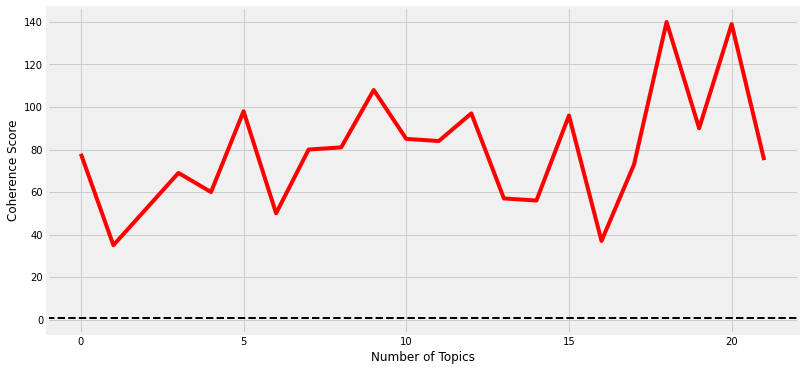

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

x_ax = range(22)
y_ax = topic_stats_df
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_ax, c='r')
plt.axhline(y=0.535, c='k', linestyle='--', linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'
xl = plt.xlabel('Number of Topics')
yl = plt.ylabel('Coherence Score')



Text(0, 0.5, 'total no.of documents')

<Figure size 1080x432 with 0 Axes>

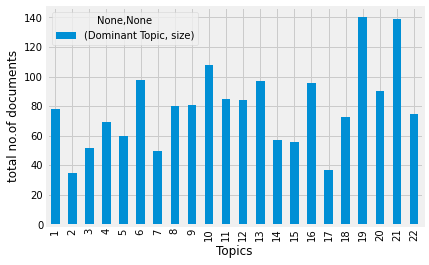

In [ ]:


data_df= topic_stats_df
plt.figure(figsize = (15, 6))
data_df.plot(kind = 'bar')
plt.xlabel('Topics')
plt.ylabel('total no.of documents')

# Predicting Topics for New Research Papers

In [ ]:
import glob
# papers manually downloaded from NIPS 16
# https://papers.nips.cc/book/advances-in-neural-information-processing-systems-29-2016

new_paper_files = glob.glob('nips16*.txt')
new_papers = []
for fn in new_paper_files:
    with open(fn, encoding='utf-8', errors='ignore', mode='r+') as f:
        data = f.read()
        new_papers.append(data)
              
print('Total New Papers:', len(new_papers))

Total New Papers: 4


In [ ]:
def text_preprocessing_pipeline(documents, normalizer_fn, bigram_model):
    norm_docs = normalizer_fn(documents)
    norm_docs_bigrams = bigram_model[norm_docs]
    return norm_docs_bigrams

def bow_features_pipeline(tokenized_docs, dictionary):
    paper_bow_features = [dictionary.doc2bow(text) 
                              for text in tokenized_docs]
    return paper_bow_features

norm_new_papers = text_preprocessing_pipeline(documents=new_papers, normalizer_fn=normalize_corpus, 
                                              bigram_model=bigram_model)
norm_bow_features = bow_features_pipeline(tokenized_docs=norm_new_papers, dictionary=dictionary)

In [ ]:
print(norm_bow_features[0][:30])

[(1, 1), (9, 1), (10, 1), (13, 1), (18, 3), (27, 3), (28, 3), (30, 1), (35, 1), (37, 2), (39, 4), (40, 1), (41, 1), (42, 2), (49, 1), (55, 1), (58, 8), (61, 2), (62, 1), (65, 1), (75, 1), (77, 1), (78, 2), (79, 1), (81, 7), (87, 4), (88, 1), (93, 1), (99, 7), (101, 1)]


In [ ]:
def get_topic_predictions(topic_model, corpus, topn=3):
    topic_predictions = topic_model[corpus]
    best_topics = [[(topic, round(wt, 3)) 
                        for topic, wt in sorted(topic_predictions[i], 
                                                key=lambda row: -row[1])[:topn]] 
                            for i in range(len(topic_predictions))]
    return best_topics
    

In [ ]:
topic_preds = get_topic_predictions(topic_model=best_lda_model, 
                                    corpus=norm_bow_features, topn=2)
topic_preds

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


[[(20, 0.218), (5, 0.171)],
 [(15, 0.216), (19, 0.109)],
 [(10, 0.297), (15, 0.165)],
 [(9, 0.428), (5, 0.241)]]

In [ ]:
results1_df = pd.DataFrame()
results1_df['Papers'] = range(1, len(new_papers)+1)
results1_df['Dominant Topics'] = [[topic_num+1 for topic_num, wt in item] for item in topic_preds]
res = results1_df.set_index(['Papers'])['Dominant Topics'].apply(pd.Series).stack().reset_index(level=1, drop=True)
results1_df = pd.DataFrame({'Dominant Topics': res.values}, index=res.index)
results1_df['Contribution %'] = [topic_wt for topic_list in 
                                        [[round(wt*100, 2) 
                                              for topic_num, wt in item] 
                                                 for item in topic_preds] 
                                    for topic_wt in topic_list]

results1_df['Topic Desc'] = [topics_df.iloc[t-1]['Terms per Topic'] for t in results1_df['Dominant Topics'].values]
results1_df['Paper Desc'] = [new_papers[i-1][:200] for i in results1_df.index.values]
results1_df

,Dominant Topics,Contribution %,Topic Desc,Paper Desc
Papers,,,,
1,21,21.80000,"field, visual, stimulus, orientation, response, map, cortex, cortical, receptive, receptive field","Cooperative Graphical Models\nJosip Djolonga\nDept. of Computer Science, ETH Zurich ¨\njosipd@inf.ethz.ch\nStefanie Jegelka\nCSAIL, MIT\nstefje@mit.edu\nSebastian Tschiatschek\nDept. of Computer S..."
1,6,17.10000,"cell, firing, direction, head, rat, response, layer, synaptic, activity, spatial","Cooperative Graphical Models\nJosip Djolonga\nDept. of Computer Science, ETH Zurich ¨\njosipd@inf.ethz.ch\nStefanie Jegelka\nCSAIL, MIT\nstefje@mit.edu\nSebastian Tschiatschek\nDept. of Computer S..."
2,16,21.60000,"distribution, gaussian, mixture, probability, variable, density, likelihood, prior, bayesian, component","Automated scalable segmentation of neurons from\nmultispectral images\nUygar Sümbül\nGrossman Center for the Statistics of Mind\nand Dept. of Statistics, Columbia University\nDouglas Roossien Jr.\..."
2,20,10.90000,"equation, solution, gradient, matrix, generalization, optimal, rate, local, minimum, distance","Automated scalable segmentation of neurons from\nmultispectral images\nUygar Sümbül\nGrossman Center for the Statistics of Mind\nand Dept. of Statistics, Columbia University\nDouglas Roossien Jr.\..."
3,11,29.70000,"spike, rate, firing, stimulus, train, spike train, firing rate, response, frequency, neuron","Unsupervised Learning of Spoken Language with\nVisual Context\nDavid Harwath, Antonio Torralba, and James R. Glass\nComputer Science and Artificial Intelligence Laboratory\nMassachusetts Institute..."
3,16,16.50000,"distribution, gaussian, mixture, probability, variable, density, likelihood, prior, bayesian, component","Unsupervised Learning of Spoken Language with\nVisual Context\nDavid Harwath, Antonio Torralba, and James R. Glass\nComputer Science and Artificial Intelligence Laboratory\nMassachusetts Institute..."
4,10,42.80000,"circuit, chip, current, voltage, analog, vlsi, transistor, gate, threshold, pulse","PAC Reinforcement Learning with Rich Observations\nAkshay Krishnamurthy\nUniversity of Massachusetts, Amherst\nAmherst, MA, 01003\nakshay@cs.umass.edu\nAlekh Agarwal\nMicrosoft Research\nNew York,..."
4,6,24.10000,"cell, firing, direction, head, rat, response, layer, synaptic, activity, spatial","PAC Reinforcement Learning with Rich Observations\nAkshay Krishnamurthy\nUniversity of Massachusetts, Amherst\nAmherst, MA, 01003\nakshay@cs.umass.edu\nAlekh Agarwal\nMicrosoft Research\nNew York,..."


In [ ]:
dom = corpus_topic_df.groupby('Dominant Topic').apply(lambda topic_set: (topic_set.sort_values(by=['Contribution %'], 
                                                                                         ascending=False)
                                                                             .iloc[0]))
dom

,Document,Dominant Topic,Contribution %,Topic Desc,Paper
Dominant Topic,,,,,
1,145,1,65.11,"equation, dynamic, solution, matrix, neuron, state, energy, attractor, constraint, eq, fixed_point, phase, stable, hopfield, rule, stability, equilibrium, nonlinear, eigenvalue, defined","568 \nDYNAMICS OF ANALOG NEURAL \nNETWORKS WITH TIME DELAY \nC.M. Marcus and R.M. Westervelt \nDivision of Applied Sciences and Department of Physics \nHarvard University, Cambridge Massachusetts ..."
2,57,2,60.21,"unit, layer, pattern, activation, representation, connection, module, structure, architecture, activity, connectionist, represent, level, type, role, processing, local, represented, part, represen...","73O \nAnalysis of distributed representation of \nconstituent structure in connectionist systems \nPaul Smolensky \nDepartment of Computer Science, University of Colorado, Boulder, CO 80309-0430 \..."
3,337,3,56.57,"rate, gradient, convergence, step, iteration, update, gradient_descent, adaptive, optimization, vector, minimum, change, derivative, constant, cost_function, optimal, line, initial, local_minimum,...","Note on Learning Rate Schedules for Stochastic \nOptimization \nChristian Darken and John Moody \nYale University \nP.O. Box 2158 Yale Station \nNew Haven, CT 06520 \nEmail: moody@cs.yale.edu \nAb..."
4,1693,4,65.82,"signal, frequency, channel, filter, spike, rate, temporal, response, noise, event, auditory, sound, delay, amplitude, detection, source, stimulus, phase, component, spike_train","An Analog VLSI Model of \nPeriodicity Extraction \nAndr6 van Schaik \nComputer Engineering Laboratory \nJ03, University of Sydney, NSW 2006 \nSydney, Australia \nandrenee. usyd. edu.au \nAbstract ..."
5,1536,5,70.11,"noise, distribution, average, curve, theory, equation, optimal, variance, correlation, generalization_error, limit, ensemble, size, eq, entropy, teacher, linear, student, effect, stochastic","Dynamics of Supervised Learning with \nRestricted Training Sets \nA.C.C. Coolen \nDept of Mathematics \nKing's College London \nStrand, London WC2R 2LS, UK \ntcoolen @mth.kcl.ac.uk \nD. Saad \nNeu..."
6,532,6,84.17,"bound, class, theorem, probability, proof, loss, hypothesis, complexity, theory, defined, assume, distribution, concept, property, bounded, linear, define, xi, sample, definition","Polynomial Uniform Convergence of \nRelative Frequencies to Probabilities \nAlberto Bertoni, Paola Campadelll;' Anna Morpurgo, Sandra Panlzza \nDipartimento di Scienze dell'Informazione \nUniversi..."
7,351,7,63.63,"map, subject, effect, stimulus, study, change, development, correlation, activity, brain, pattern, similarity, experiment, human, trial, cue, theory, eye, rule, response","Further Studies of a Model for the \nDevelopment and Regeneration \nof Eye-Brain Maps \nJ.D. Cowan & A.E. Friedman \nDepartment of Mathematics, Committee on \nNeurobiology, and Brain Research Inst..."
8,1031,8,60.34,"visual, motion, response, direction, receptive_field, region, orientation, spatial, location, center, cell, field, stimulus, contrast, local, velocity, map, edge, contour, stage","A \nNeural Network Model of 3-D \nLightness Perception \nLuiz Pessoa \nFederal Univ. of Rio de Janeiro \nRio de Janeiro, RJ, Brazil \npessoa@cos.ufrj.br \nWilliam D. Ross \nBoston University \nBos..."
9,1688,9,54.02,"training, hidden_unit, task, rule, net, trained, architecture, generalization, back_propagation, hidden_layer, learn, target, hidden, training_set, table, learned, knowledge, backpropagation, epoc...","Learning Statistically Neutral Tasks \nwithout Expert Guidance \nTon Weijters \nInformation Technology, \nEindhoven University, \nThe Netherlands \nAntal van den Bosch \nILK, \nTilburg University,..."


# Topic Models with Non-Negative Matrix Factorization (NMF)

# Text Representation with Feature Engineering

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=20, max_df=0.6, ngram_range=(1,2),
                     token_pattern=None, tokenizer=lambda doc: doc,
                     preprocessor=lambda doc: doc)
cv_features = cv.fit_transform(norm_papers)
cv_features.shape

(1740, 14408)

In [ ]:
vocabulary = np.array(cv.get_feature_names())
print('Total Vocabulary Size:', len(vocabulary))

Total Vocabulary Size: 14408


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
%%time
from sklearn.decomposition import NMF
TOTAL_TOPICS = 22
nmf_model = NMF(n_components=TOTAL_TOPICS, solver='cd', max_iter=500,
                random_state=42, alpha=.1, l1_ratio=.85)
document_topics = nmf_model.fit_transform(cv_features)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/re

CPU times: user 39.2 s, sys: 1.19 s, total: 40.4 s
Wall time: 40.8 s


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  ConvergenceWarning,


In [ ]:
top_terms = 10
topic_terms = nmf_model.components_
topic_key_term_idxs = np.argsort(-np.absolute(topic_terms), axis=1)[:, :top_terms]
topic_keyterms = vocabulary[topic_key_term_idxs]
topics = [', '.join(topic) for topic in topic_keyterms]
pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame(topics,
                         columns = ['Terms per Topic'],
                         index=['Topic'+str(t) for t in range(1, TOTAL_TOPICS+1)])
topics_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,Terms per Topic
Topic1,"bound, class, threshold, theorem, let, probability, size, dimension, vc, sample"
Topic2,"neuron, synaptic, connection, potential, synapsis, activity, excitatory, dynamic, layer, synapse"
Topic3,"state, dynamic, transition, sequence, probability, finite, recurrent, markov, equation, machine"
Topic4,"image, face, pixel, recognition, local, scale, texture, digit, distance, filter"
Topic5,"hidden, layer, net, hidden unit, task, hidden layer, architecture, back, trained, propagation"
Topic6,"cell, firing, direction, head, rat, response, layer, synaptic, activity, spatial"
Topic7,"word, recognition, speech, context, speaker, hmm, character, speech recognition, phoneme, probability"
Topic8,"signal, noise, source, filter, frequency, component, speech, channel, sound, independent"
Topic9,"control, controller, motor, trajectory, movement, dynamic, forward, feedback, arm, inverse"
Topic10,"circuit, chip, current, voltage, analog, vlsi, transistor, gate, threshold, pulse"


In [ ]:
pd.options.display.float_format = '{:,.3f}'.format
dt_df = pd.DataFrame(document_topics, 
                     columns=['T'+str(i) for i in range(1, TOTAL_TOPICS+1)])
dt_df.head(10)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,...,T13,T14,T15,T16,T17,T18,T19,T20,T21,T22
0,0.469,0.273,0.129,0.004,0.000,0.004,0.000,0.000,0.137,0.000,...,0.000,0.000,0.000,0.000,0.000,0.082,0.307,0.777,0.050,0.000
1,0.006,0.498,0.032,0.000,0.595,1.694,0.001,0.145,0.143,0.000,...,0.123,0.000,0.033,0.000,0.000,0.075,0.021,0.000,0.078,0.000
2,0.368,0.140,0.534,0.000,0.000,0.000,0.000,0.000,0.000,0.098,...,0.400,0.012,0.000,0.000,0.004,0.000,0.097,0.468,0.000,0.000
3,0.277,0.115,1.436,0.025,0.000,0.123,0.000,0.097,0.200,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.573,0.572,0.000,0.000
4,0.000,1.057,0.000,0.006,0.000,0.550,0.000,0.033,0.072,0.030,...,0.000,0.000,0.000,0.000,0.072,0.036,0.033,0.044,0.301,0.000
5,0.000,0.008,0.000,0.287,0.566,0.041,0.034,0.018,0.932,0.174,...,0.057,0.000,0.055,0.000,0.048,0.119,0.153,0.189,0.080,0.267
6,0.093,0.258,0.000,0.038,0.462,0.000,1.208,0.212,0.000,0.024,...,0.028,0.093,0.369,0.000,0.000,0.086,0.196,0.000,0.066,0.008
7,0.141,0.081,1.638,0.030,0.243,0.948,0.000,0.878,0.000,0.000,...,0.051,0.744,0.151,0.000,0.000,0.126,0.124,0.672,1.297,0.000
8,0.226,0.381,0.063,0.000,0.657,7.304,0.005,0.082,0.000,0.300,...,0.021,0.000,0.000,0.116,0.000,0.398,0.652,0.000,0.658,0.000
9,0.095,1.574,0.000,0.000,0.355,0.000,0.004,0.000,0.036,0.473,...,0.622,0.186,0.047,0.000,0.341,0.000,1.124,0.119,0.140,0.229


In [ ]:
pd.options.display.float_format = '{:,.5f}'.format
pd.set_option('display.max_colwidth', 200)

max_score_topics = dt_df.max(axis=0)
dominant_topics = max_score_topics.index
term_score = max_score_topics.values
document_numbers = [dt_df[dt_df[t] == max_score_topics.loc[t]].index[0]
                       for t in dominant_topics]
documents = [papers[i] for i in document_numbers]

results_df3 = pd.DataFrame({'Dominant Topic': dominant_topics, 'Max Score': term_score,
                          'Paper Num': document_numbers, 'Topic': topics_df['Terms per Topic'], 
                          'Paper Name': documents})
results_df3

,Dominant Topic,Max Score,Paper Num,Topic,Paper Name
Topic1,T1,2.05174,1275,"bound, class, threshold, theorem, let, probability, size, dimension, vc, sample","For valid generalization, the size of the \nweights is more important than the size \nof the network \nPeter L. Bartlett \nDepartment of Systems Engineering \nResearch School of Information Scienc..."
Topic2,T2,3.55809,316,"neuron, synaptic, connection, potential, synapsis, activity, excitatory, dynamic, layer, synapse","Signal Processing by Multiplexing and \nDemultiplexing in Neurons \nDavid C. Tam \nDivision of Neuroscience \nBaylor College of Medicine \nHouston, TX 77030 \ndtamCnext-cns.neusc.bcm.tmc.edu \nAb..."
Topic3,T3,4.32487,1195,"state, dynamic, transition, sequence, probability, finite, recurrent, markov, equation, machine","Reinforcement Learning for Mixed \nOpen-loop and Closed-loop Control \nEric A. Hansen, Andrew G. Barto, and Shlomo Zilbersteln \nDepartment of Computer Science \nUniversity of Massachusetts \nAmhe..."
Topic4,T4,3.84055,571,"image, face, pixel, recognition, local, scale, texture, digit, distance, filter","Illumination and View Position in 3D Visual \nRecognition \nAmnon Shashua \nM.I.T. Artificial Intelligence Lab., NE43-737 \nand Department of Brain and Cognitive Science \nCambridge, MA 02139 \nAb..."
Topic5,T5,2.78233,754,"hidden, layer, net, hidden unit, task, hidden layer, architecture, back, trained, propagation","Generation of Internal Representation \nby c-Transformation \nRyotaro Kamimura \nInformation Science Laboratory \nTokai University \n1117 Kitakaname Hiratsuka Kanagawa 259-12, Japan \nAbstract \nI..."
Topic6,T6,7.30438,8,"cell, firing, direction, head, rat, response, layer, synaptic, activity, spatial","317 \nPARTITIONING OF SENSORY DATA BY A COPTICAI, NETWOPK  \nRichard Granger, Jos Ambros-Ingerson, Howard Henry, Gary Lynch \nCenter for the Neurobiology of Learning and Memory \nUniversity of..."
Topic7,T7,5.00353,1325,"word, recognition, speech, context, speaker, hmm, character, speech recognition, phoneme, probability","Comparison of Human and Machine Word \nRecognition \nM. Schenkel \nDept of Electrical Eng. \nUniversity of Sydney \nSydney, NSW 2006, Australia \nschenkel@sedal.usyd.edu.au \nC. Latimer \nDept of ..."
Topic8,T8,3.65222,231,"signal, noise, source, filter, frequency, component, speech, channel, sound, independent","232 Sejnowski, Yuhas, Goldstein and Jenkins \nCombining Visual and \nwith a Neural Network \nAcoustic Speech Signals \nImproves Intelligibility \nT.J. Sejnowski \nThe Salk Institute \nand \nDepart..."
Topic9,T9,5.05733,955,"control, controller, motor, trajectory, movement, dynamic, forward, feedback, arm, inverse","An Integrated Architecture of Adaptive Neural Network \nControl for Dynamic Systems \nLiu Ke '2 Robert L. Tokaf Brian D.McVey z \nCenter for Nonlinear Studies, 2Applied Theoretical Physics Divis..."
Topic10,T10,2.93588,1673,"circuit, chip, current, voltage, analog, vlsi, transistor, gate, threshold, pulse","Kirchoff Law Markov Fields for Analog \nCircuit Design \nRichard M. Golden * \nRMG Consulting Inc. \n2000 Fresno Road, Plano, Texas 75074 \nRMG CONS UL T@A OL. COM, \nwww. neural-network. corn \nA..."


# Predicting Topics for New Research Papers

In [ ]:
import glob
# papers manually downloaded from NIPS 16
# https://papers.nips.cc/book/advances-in-neural-information-processing-systems-29-2016

new_paper_files = glob.glob('nips16*.txt')
new_papers = []
for fn in new_paper_files:
    with open(fn, encoding='utf-8', errors='ignore', mode='r+') as f:
        data = f.read()
        new_papers.append(data)
              
print('Total New Papers:', len(new_papers))

Total New Papers: 4


In [ ]:
norm_new_papers = normalize_corpus(new_papers)
cv_new_features = cv.transform(norm_new_papers)
cv_new_features.shape

(4, 14408)

In [ ]:
topic_predictions = nmf_model.transform(cv_new_features)
best_topics = [[(topic, round(sc, 3)) 
                    for topic, sc in sorted(enumerate(topic_predictions[i]), 
                                            key=lambda row: -row[1])[:2]] 
                        for i in range(len(topic_predictions))]
best_topics

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,


[[(0, 1.329), (15, 0.802)],
 [(3, 2.088), (1, 1.31)],
 [(3, 3.006), (6, 2.217)],
 [(21, 3.956), (2, 2.196)]]

In [ ]:
results2_df = pd.DataFrame()
results2_df['Papers'] = range(1, len(new_papers)+1)
results2_df['Dominant Topics'] = [[topic_num+1 for topic_num, sc in item] for item in best_topics]
res = results2_df.set_index(['Papers'])['Dominant Topics'].apply(pd.Series).stack().reset_index(level=1, drop=True)
results2_df = pd.DataFrame({'Dominant Topics': res.values}, index=res.index)
results2_df['Topic Score'] = [topic_sc for topic_list in 
                                        [[round(sc*100, 2) 
                                              for topic_num, sc in item] 
                                                 for item in best_topics] 
                                    for topic_sc in topic_list]

results2_df['Topic Desc'] = [topics_df.iloc[t-1]['Terms per Topic'] for t in results2_df['Dominant Topics'].values]
results2_df['Paper Desc'] = [new_papers[i-1][:200] for i in results2_df.index.values]

results2_df

,Dominant Topics,Topic Score,Topic Desc,Paper Desc
Papers,,,,
1,1,132.90000,"bound, class, threshold, theorem, let, probability, size, dimension, vc, sample","Cooperative Graphical Models\nJosip Djolonga\nDept. of Computer Science, ETH Zurich ¨\njosipd@inf.ethz.ch\nStefanie Jegelka\nCSAIL, MIT\nstefje@mit.edu\nSebastian Tschiatschek\nDept. of Computer S..."
1,16,80.20000,"distribution, gaussian, mixture, probability, variable, density, likelihood, prior, bayesian, component","Cooperative Graphical Models\nJosip Djolonga\nDept. of Computer Science, ETH Zurich ¨\njosipd@inf.ethz.ch\nStefanie Jegelka\nCSAIL, MIT\nstefje@mit.edu\nSebastian Tschiatschek\nDept. of Computer S..."
2,4,208.80000,"image, face, pixel, recognition, local, scale, texture, digit, distance, filter","Automated scalable segmentation of neurons from\nmultispectral images\nUygar Sümbül\nGrossman Center for the Statistics of Mind\nand Dept. of Statistics, Columbia University\nDouglas Roossien Jr.\..."
2,2,131.00000,"neuron, synaptic, connection, potential, synapsis, activity, excitatory, dynamic, layer, synapse","Automated scalable segmentation of neurons from\nmultispectral images\nUygar Sümbül\nGrossman Center for the Statistics of Mind\nand Dept. of Statistics, Columbia University\nDouglas Roossien Jr.\..."
3,4,300.60000,"image, face, pixel, recognition, local, scale, texture, digit, distance, filter","Unsupervised Learning of Spoken Language with\nVisual Context\nDavid Harwath, Antonio Torralba, and James R. Glass\nComputer Science and Artificial Intelligence Laboratory\nMassachusetts Institute..."
3,7,221.70000,"word, recognition, speech, context, speaker, hmm, character, speech recognition, phoneme, probability","Unsupervised Learning of Spoken Language with\nVisual Context\nDavid Harwath, Antonio Torralba, and James R. Glass\nComputer Science and Artificial Intelligence Laboratory\nMassachusetts Institute..."
4,22,395.60000,"action, policy, state, reinforcement, task, reinforcement learning, optimal, step, reward, value function","PAC Reinforcement Learning with Rich Observations\nAkshay Krishnamurthy\nUniversity of Massachusetts, Amherst\nAmherst, MA, 01003\nakshay@cs.umass.edu\nAlekh Agarwal\nMicrosoft Research\nNew York,..."
4,3,219.60000,"state, dynamic, transition, sequence, probability, finite, recurrent, markov, equation, machine","PAC Reinforcement Learning with Rich Observations\nAkshay Krishnamurthy\nUniversity of Massachusetts, Amherst\nAmherst, MA, 01003\nakshay@cs.umass.edu\nAlekh Agarwal\nMicrosoft Research\nNew York,..."


# Comparision

In [ ]:
compare = pd.DataFrame()
compare = pd.concat([results1_df, results2_df], axis=1)
compare

,Dominant Topics,Contribution %,Topic Desc,Paper Desc,Dominant Topics,Topic Score,Topic Desc,Paper Desc
Papers,,,,,,,,
1,21,21.80000,"field, visual, stimulus, orientation, response, map, cortex, cortical, receptive, receptive field","Cooperative Graphical Models\nJosip Djolonga\nDept. of Computer Science, ETH Zurich ¨\njosipd@inf.ethz.ch\nStefanie Jegelka\nCSAIL, MIT\nstefje@mit.edu\nSebastian Tschiatschek\nDept. of Computer S...",1,132.90000,"bound, class, threshold, theorem, let, probability, size, dimension, vc, sample","Cooperative Graphical Models\nJosip Djolonga\nDept. of Computer Science, ETH Zurich ¨\njosipd@inf.ethz.ch\nStefanie Jegelka\nCSAIL, MIT\nstefje@mit.edu\nSebastian Tschiatschek\nDept. of Computer S..."
1,6,17.10000,"cell, firing, direction, head, rat, response, layer, synaptic, activity, spatial","Cooperative Graphical Models\nJosip Djolonga\nDept. of Computer Science, ETH Zurich ¨\njosipd@inf.ethz.ch\nStefanie Jegelka\nCSAIL, MIT\nstefje@mit.edu\nSebastian Tschiatschek\nDept. of Computer S...",16,80.20000,"distribution, gaussian, mixture, probability, variable, density, likelihood, prior, bayesian, component","Cooperative Graphical Models\nJosip Djolonga\nDept. of Computer Science, ETH Zurich ¨\njosipd@inf.ethz.ch\nStefanie Jegelka\nCSAIL, MIT\nstefje@mit.edu\nSebastian Tschiatschek\nDept. of Computer S..."
2,16,21.60000,"distribution, gaussian, mixture, probability, variable, density, likelihood, prior, bayesian, component","Automated scalable segmentation of neurons from\nmultispectral images\nUygar Sümbül\nGrossman Center for the Statistics of Mind\nand Dept. of Statistics, Columbia University\nDouglas Roossien Jr.\...",4,208.80000,"image, face, pixel, recognition, local, scale, texture, digit, distance, filter","Automated scalable segmentation of neurons from\nmultispectral images\nUygar Sümbül\nGrossman Center for the Statistics of Mind\nand Dept. of Statistics, Columbia University\nDouglas Roossien Jr.\..."
2,20,10.90000,"equation, solution, gradient, matrix, generalization, optimal, rate, local, minimum, distance","Automated scalable segmentation of neurons from\nmultispectral images\nUygar Sümbül\nGrossman Center for the Statistics of Mind\nand Dept. of Statistics, Columbia University\nDouglas Roossien Jr.\...",2,131.00000,"neuron, synaptic, connection, potential, synapsis, activity, excitatory, dynamic, layer, synapse","Automated scalable segmentation of neurons from\nmultispectral images\nUygar Sümbül\nGrossman Center for the Statistics of Mind\nand Dept. of Statistics, Columbia University\nDouglas Roossien Jr.\..."
3,11,29.70000,"spike, rate, firing, stimulus, train, spike train, firing rate, response, frequency, neuron","Unsupervised Learning of Spoken Language with\nVisual Context\nDavid Harwath, Antonio Torralba, and James R. Glass\nComputer Science and Artificial Intelligence Laboratory\nMassachusetts Institute...",4,300.60000,"image, face, pixel, recognition, local, scale, texture, digit, distance, filter","Unsupervised Learning of Spoken Language with\nVisual Context\nDavid Harwath, Antonio Torralba, and James R. Glass\nComputer Science and Artificial Intelligence Laboratory\nMassachusetts Institute..."
3,16,16.50000,"distribution, gaussian, mixture, probability, variable, density, likelihood, prior, bayesian, component","Unsupervised Learning of Spoken Language with\nVisual Context\nDavid Harwath, Antonio Torralba, and James R. Glass\nComputer Science and Artificial Intelligence Laboratory\nMassachusetts Institute...",7,221.70000,"word, recognition, speech, context, speaker, hmm, character, speech recognition, phoneme, probability","Unsupervised Learning of Spoken Language with\nVisual Context\nDavid Harwath, Antonio Torralba, and James R. Glass\nComputer Science and Artificial Intelligence Laboratory\nMassachusetts Institute..."
4,10,42.80000,"circuit, chip, current, voltage, analog, vlsi, transistor, gate, threshold, pulse","PAC Reinforcement Learning with Rich Observations\nAkshay Krish

In [ ]:
pd.set_option('display.max_colwidth', 200)
(corpus_topic_df[corpus_topic_df['Dominant Topic']
                 .isin([21])])


,Document,Dominant Topic,Contribution %,Topic Desc,Paper
125,125,21,17.44000,"probability, distribution, prior, gaussian, mixture, variable, density, bayesian, likelihood, sample, estimate, log, approximation, component, em, posterior, step, probabilistic, evidence, procedure","256 \nAN INFORMATION THEORETIC APPROACH TO \nRULE-BASED CONNECTIONIST EXPERT SYSTEMS \nRodney M. Goodman, John W. Miller \nDepartment of Electrical Engineering \nCaltech 116-81 \nPasadena, CA 9112..."
208,208,21,27.25000,"probability, distribution, prior, gaussian, mixture, variable, density, bayesian, likelihood, sample, estimate, log, approximation, component, em, posterior, step, probabilistic, evidence, procedure",Training Stochastic Model Recognition Algorithms 211 \nTraining Stochastic Model Recognition \nAlgorithms as Networks can lead to Maximum \nMutual Information Estimation of Parameters \nJohn S. Br...
251,251,21,27.00000,"probability, distribution, prior, gaussian, mixture, variable, density, bayesian, likelihood, sample, estimate, log, approximation, component, em, posterior, step, probabilistic, evidence, procedure",388 Smith and Miller \nBayesian Inference of Regular Grammar \nand Markov Source Models \nKurt R. Smith and Michael I. Miller \nBiomedical Computer Laboratory \nand \nElectronic Signals and System...
298,298,21,22.90000,"probability, distribution, prior, gaussian, mixture, variable, density, bayesian, likelihood, sample, estimate, log, approximation, component, em, posterior, step, probabilistic, evidence, procedure",On Stochastic Complexity and Admissible \nModels for Neural Network Classifiers \nPadhraic Smyth \nCommunications Systems Research \nJet Propulsion Laboratory \nCalifornia Institute of Technology ...
324,324,21,18.93000,"probability, distribution, prior, gaussian, mixture, variable, density, bayesian, likelihood, sample, estimate, log, approximation, component, em, posterior, step, probabilistic, evidence, procedure","Transforming Neural-Net Output Levels \nto Probability Distributions \nJohn S. Denker and Yann leCun \nAT&T Bell Laboratories \nHolmdel, NJ 07733 \nAbstract \n(1) The outputs of a typical multi-ou..."
...,...,...,...,...,...
1721,1721,21,34.67000,"probability, distribution, prior, gaussian, mixture, variable, density, bayesian, likelihood, sample, estimate, log, approximation, component, em, posterior, step, probabilistic, evidence, procedure","Bayesian model selection for Support \nVector machines, Gaussian processes and \nother kernel classifiers \nMatthias Seeger \nInstitute for Adaptive and Neural Computation \nUniversity of Edinburg..."
1724,1724,21,33.86000,"probability, distribution, prior, gaussian, mixture, variable, density, bayesian, likelihood, sample, estimate, log, approximation, component, em, posterior, step, probabilistic, evidence, procedure","A MCMC approach to Hierarchical Mixture \nModelling \nChristopher K. I. Williams \nInstitute for Adaptive and Neural Computation \nDivision of Informatics, University of Edinburgh \n5 Forrest Hill..."
1726,1726,21,32.38000,"probability, distribution, prior, gaussian, mixture, variable, density, bayesian, likelihood, sample, estimate, log, approximation, component, em, posterior, step, probabilistic, evidence, procedure","Correctness of belief propagation in Gaussian \ngraphical models of arbitrary topology \nYair Weiss \nComputer Science Division \nUC Berkeley, 485 Soda Hall \nBerkeley, CA 94720-1776 \nPhone: 510-..."
1727,1727,21,29.38000,"probability, distribution, prior, gaussian, mixture, variable, density, bayesian, likelihood, sample, estimate, log, approximation, component, em, posterior, step, probabilistic, evidence, procedure","Bayesian Map Learning in Dynamic \nEnvironments \nKevin P. Murphy \nComputer Science Division \nUniversity of California \nBerkeley, CA 94720-1776 \nmurphyk @cs. berkeley. edu \nAbstract \nWe cons..."


In [ ]:
pd.set_option('display.max_colwidth', 200)
(corpus_topic_df[corpus_topic_df['Dominant Topic']
                 .isin([6])])

,Document,Dominant Topic,Contribution %,Topic Desc,Paper
54,54,6,35.16000,"bound, class, theorem, probability, proof, loss, hypothesis, complexity, theory, defined, assume, distribution, concept, property, bounded, linear, define, xi, sample, definition","1 \nCONNECTIVITY VERSUS ENTROPY \nYaser S. Abu-Mostafa \nCalifornia Institute of Technology \nPasadena, CA 91125 \nABSTRACT \nHow does the connectivity of a neural network (number of synapses per ..."
88,88,6,19.14000,"bound, class, theorem, probability, proof, loss, hypothesis, complexity, theory, defined, assume, distribution, concept, property, bounded, linear, define, xi, sample, definition","850 \nStrategies for Teaching Layered Networks \nClassification Tasks \nBen S. Wittner I and John S. Denker \nAT&T Bell Laboratories \nHolmdel, New Jersey 07733 \nAbstract \nThere is a widespread ..."
162,162,6,52.25000,"bound, class, theorem, probability, proof, loss, hypothesis, complexity, theory, defined, assume, distribution, concept, property, bounded, linear, define, xi, sample, definition",81 \nWHAT SIZE NET GIVES VALID \nG EN ERALIZ ATIO N? * \nEric B. Baum \nDepartment of Physics \nPrinceton University \nPrinceton NJ 08540 \nDavid Haussler \nComputer and Information Science \nUniv...
198,198,6,65.81000,"bound, class, theorem, probability, proof, loss, hypothesis, complexity, theory, defined, assume, distribution, concept, property, bounded, linear, define, xi, sample, definition","676 Baum \nThe Perceptron Algorithm Is Fast for \nNon-Malicious Distributions \nErice B. Baum \nNEC Research Institute \n4 Independence Way \nPrinceton, NJ 08540 \nAbstract\nWithin the context of ..."
203,203,6,24.10000,"bound, class, theorem, probability, proof, loss, hypothesis, complexity, theory, defined, assume, distribution, concept, property, bounded, linear, define, xi, sample, definition","566 Atlas, Cohn and Ladner \nTraining Connectionist Networks with \nQueries and Selective Sampling \nLes Atlas \nDept. of E.E. \nDavid Cohn \nDept. of C.S. &: E. \nRichard Ladner \nDept. of C.S. &..."
...,...,...,...,...,...
1687,1687,6,33.11000,"bound, class, theorem, probability, proof, loss, hypothesis, complexity, theory, defined, assume, distribution, concept, property, bounded, linear, define, xi, sample, definition","Support Vector Method for Novelty Detection \nBernhard Schilkopf*, Robert Williamson, \nAlex Smola, John Shawe-Taylor t, John Platt* \n* Microsoft Research Ltd., 1 Guildhall Street, Cambridge, UK..."
1697,1697,6,44.27000,"bound, class, theorem, probability, proof, loss, hypothesis, complexity, theory, defined, assume, distribution, concept, property, bounded, linear, define, xi, sample, definition","The Relaxed Online \nMaximum Margin Algorithm \nYi Li and Philip M. Long \nDepartment of Computer Science \nNational University of Singapore \nSingapore 119260, Republic of Singapore \n{ liyi, plo..."
1703,1703,6,35.21000,"bound, class, theorem, probability, proof, loss, hypothesis, complexity, theory, defined, assume, distribution, concept, property, bounded, linear, define, xi, sample, definition",Leveraged Vector Machines \nYoram Singer \nHebrew University \nsinger@cs.huj i. ac. il \nAbstract \nWe describe an iterative algorithm for building vector machines used in \nclassification tasks. ...
1713,1713,6,27.04000,"bound, class, theorem, probability, proof, loss, hypothesis, complexity, theory, defined, assume, distribution, concept, property, bounded, linear, define, xi, sample, definition","Model selection in clustering by uniform \nconvergence bounds* \nJoachim M. Buhmann nd Marcus Held \nInstitut fiir Informatik III, \nRSmerstrafie 164, D-53117 Bonn, Germany \n{jb,held)@cs.uni-bon..."


In [ ]:
pd.set_option('display.max_colwidth', 200)
(results_df3[results_df3['Dominant Topic']
                 .isin([21])])

In [ ]:
results_df3.groupby('Dominant Topic').apply(lambda topic_set: (topic_set.sort_values(by=['Dominant Topic'], 
                                                                                         ascending=False)
                                                                             .iloc[0]))

,Dominant Topic,Max Score,Paper Num,Topic,Paper Name
Dominant Topic,,,,,
T1,T1,2.05174,1275,"bound, class, threshold, theorem, let, probability, size, dimension, vc, sample","For valid generalization, the size of the \nweights is more important than the size \nof the network \nPeter L. Bartlett \nDepartment of Systems Engineering \nResearch School of Information Scienc..."
T10,T10,2.93588,1673,"circuit, chip, current, voltage, analog, vlsi, transistor, gate, threshold, pulse","Kirchoff Law Markov Fields for Analog \nCircuit Design \nRichard M. Golden * \nRMG Consulting Inc. \n2000 Fresno Road, Plano, Texas 75074 \nRMG CONS UL T@A OL. COM, \nwww. neural-network. corn \nA..."
T11,T11,6.04837,1133,"spike, rate, firing, stimulus, train, spike train, firing rate, response, frequency, neuron","Information through a Spiking Neuron \nCharles F. Stevens and Anthony Zador \nSalk Institute MNL/S \nLa Jolla, CA 92037 \nzador@salk.edu \nAbstract \nWhile it is generally agreed that neurons tran..."
T12,T12,5.92210,942,"rule, learning rule, knowledge, category, condition, domain, symbolic, fuzzy, change, extraction","Extracting Rules from Artificial Neural Networks \nwith Distributed Representations \nSebastian Thrun \nUniversity of Bonn \nDepartment of Computer Science III \nR6merstr. 164, D-53117 Bonn, Germa..."
T13,T13,3.56227,1622,"node, tree, decision, level, graph, structure, decision tree, leaf, path, layer","Boosting with Multi-Way Branching in \nDecision Trees \nYishay Mansour \nDavid McAllester \nAT&T Labs-Research \n180 Park Ave \nFlorham Park NJ 07932 \n{mansour, dmac}@research.att.com \nAbstract ..."
T14,T14,4.00005,285,"feature, map, task, search, classification, experiment, target, part, feature vector, representation","266 Zemel, Mozer and Hinton \nTRAFFIC: Recognizing Objects Using \nHierarchical Reference Frame Transformations \nRichard S. Zemel \nComputer Science Dept. \nUniversity of Toronto \nToronto, ONT M..."
T15,T15,5.05634,214,"classifier, class, classification, rbf, decision, region, rate, test, error rate, center",168 Lee and Lippmann \nPractical Characteristics of Neural Network \nand Conventional Pattern Classifiers on \nArtificial and Speech Problems* \nYuchun Lee \nDigital Equipment Corp. \n40 Old Bolto...
T16,T16,2.75758,1129,"distribution, gaussian, mixture, probability, variable, density, likelihood, prior, bayesian, component","Discovering Structure in Continuous \nVariables Using Bayesian Networks \nReimar Hofmann and Volker Tresp* \nSiemens AG, Central Research \nOtto-Hahn-Ring 6 \n81730 Mfinchen, Germany \nAbstract \n..."
T17,T17,5.49736,1004,"motion, direction, velocity, visual, moving, target, stage, stimulus, eye, flow","A model of transparent motion and \nnon-transparent motion aftereffects \nAlexander Grunewald* \nMax-Planck Institut fiir biologische Kybernetik \nSpemannstral]e 38 \nD-72076 Tiibingen, Germany \n..."


In [ ]:
coherence_scores = [ 0.380,0.397,0.437, 0.445,0.487, 0.519, 0.524, 0.520, 0.505, 0.513, 0.523,0.515, 0.535, 0.515, 0.505, 0.535, 0.533, 0.517, 0.548, 0.525, 0.550, 0.539,0.535, 0.536, 0.534, 0.513, 0.523,0.537,0.535]

In [ ]:
y_bx = [0.450,0.459,0.452,0.453,0.457,0.250,0.457,0.531,0.455,0.452,0.449,0.456,0.444,0.456,0.449,0.460,0.449,0.454,0.459,0.444,0.449,0.452,0.459,0.457,0.452,0.459,0.459,0.449,0.456,]

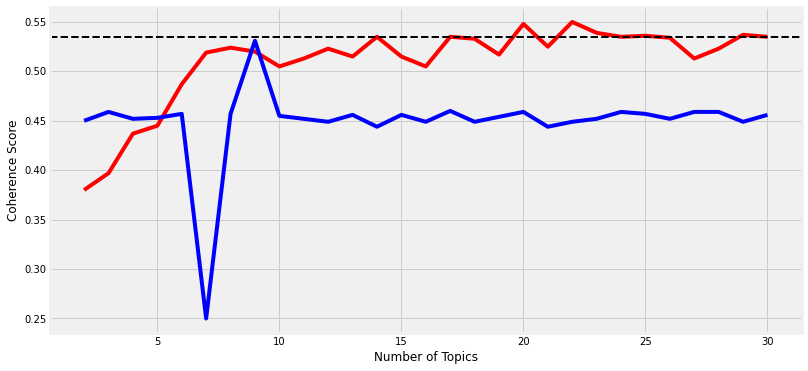

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

x_ax = range(2, 31, 1)
y_ax = coherence_scores
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_ax, c='r')
plt.plot(x_ax, y_bx, c='b')
plt.axhline(y=0.535, c='k', linestyle='--', linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'
xl = plt.xlabel('Number of Topics')
yl = plt.ylabel('Coherence Score')